In [ ]:
import numpy as np
import activation_functions as act_funs
class Multi_Layer_Perceptron():
    
    def __init__(self, X, T, bias = False, number_of_layers):
        self.D = X.shape[0]
        self.N = X.shape[1]
        self.bias = bias
        self.output_dim = T.shape[0]
        if bias == True:
            self.X = self.X_add_bias(X)
        else:
            self.X = X
        self.T = T
        self.eta = 0.001
        self.mse = 0
        self.errors = []
        self.epochs = 100
        self.number_of_layers = number_of_layers
        self.W_layers = init_W_layers()
        #self.delta_W_layers = ([np.zeros([self.T.shape[0],
        #                                  self.X.shape[0]])]
        #                       *self.number_of_layers)
    
    def X_add_bias(self, X):
        X_bias = np.ones([X.shape[0] + 1, X.shape[1]])
        X_bias[:-1,:] = np.copy(X)
        return X_bias
    
    def init_W_layers(self):
        W_layers = []
        for i in range(self.number_of_layers):
            if self.bias == True:
                W_layers.append(
                    np.random.rand(self.output_dim, self.D + 1))
            else:
                W_layers.append(
                    np.random.rand(self.output_dim, self.D))
        return W_layers
    
    def indicator(self,W,x):
        if np.matmul(W,x) >= 0:
            return 1
        else:
            return 0
    
    def seq_learn(self,layer_idx):
        for i in range(self.N):
            x = self.X[:,i].reshape(self.D, 1)
            y = self.indicator(self.W_layers[layer],x)
            t = self.T[:,i]
            if t == 0 and y == 1:
                delta_W = -lr*x.T
            if t == 1 and y == 0:
                delta_W += lr*x.T
            self.weight_layers[layer_idx] = np.add(self.W[layer_idx],
                                                   delta_W)
            errors.append(mse)
        return W, errors
    
    def batch_learn(self, layer_idx):
        for e in range(self.epochs):
            for i in range(self.N):
                x = self.X[:,i].reshape(self.D, 1)
                y = self.indicator(self.W_layers[layer],x)
                t = self.T[:,i]
                if t == 0 and y == 1:
                    self.delta_W += -lr*x.T
                if t == 1 and y == 0:
                    delta_W += lr*x.T
                mse += 0.5*(y-t)**2
            W = np.add(W, delta_W) # Batch learning
            errors.append(mse)
        return W, errors

In [42]:
def perceptron_learning(lr, epoch, W, X, T, classA, classB, bias = False):    
    errors = []
    for e in range(epoch):
        delta_W = np.zeros(W.shape)
        mse = 0
        for i in range(X.shape[1]):
            x = X[:,i].reshape(X.shape[0], 1)
            y = indicator(W,x)
            t = T_percept[:,i]
            if t == 0 and y == 1:
                delta_W += -lr*x.T
            if t == 1 and y == 0:
                delta_W += lr*x.T
            mse += 0.5*(y-t)**2
        W = np.add(W, delta_W) # Batch learning
        errors.append(mse)
        
    plt.figure(figsize=(10,10))
    plt.plot(classA[:,0], classA[:,1], 'bo', color = 'b')
    plt.plot(classB[:,0], classB[:,1], 'bo', color = 'r')
    if bias == True:
        plt.plot(w_line_vec(W, 0, 1, bias = True))
        plt.plot(norm_vec(w_line_vec(W, 0, 1, bias = True)))
    else:
        plt.plot(w_line_vec(W, 0, 1))
        plt.plot(norm_vec(w_line_vec(W, 0, 1)))
    
    return W, errors

In [43]:
def delta_learning(lr, epoch, W, X, T, classA, classB, bias = False):    
    errors = [] 
    for e in range(epoch):
        delta_W = np.zeros(W.shape)
        mse = 0
        for i in range(X.shape[1]):
            x = X[:,i].reshape(X.shape[0], 1)
            y = np.matmul(W,x)
            t = T_percept[:,i]
            e = t - y
            delta_W += lr*e*x.T
            mse += 0.5*(e)**2
        W = np.add(W, delta_W) # Batch learning
        errors.append(mse)

    plt.figure(figsize=(10,10))
    plt.plot(classA[:,0], classA[:,1], 'bo', color = 'b')
    plt.plot(classB[:,0], classB[:,1], 'bo', color = 'r')
    if bias == True:
        plt.plot(w_line_vec(W, 0, 1, bias = True))
        plt.plot(norm_vec(w_line_vec(W, 0, 1, bias = True)))
    else:
        plt.plot(w_line_vec(W, 0, 1))
        plt.plot(norm_vec(w_line_vec(W, 0, 1)))
    
    return W, errors

### Perceptron learning without bias

In [44]:
W_old_per = np.copy(W)
per_errors = []

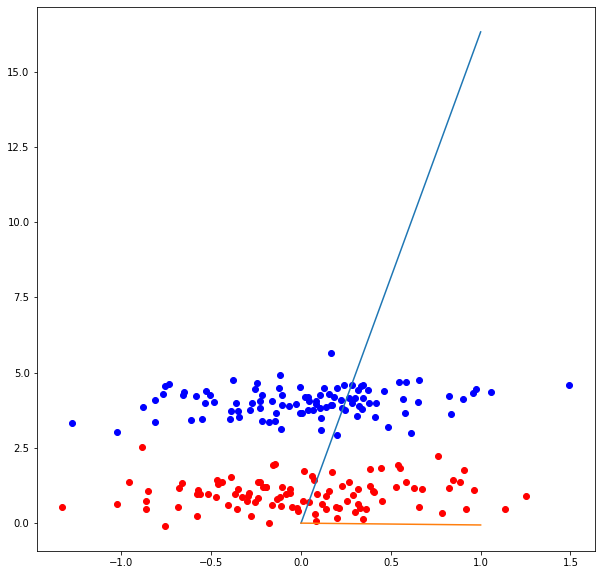

In [45]:
W_new_per, new_per_errors = perceptron_learning(0.001, 1000, W_old_per, X, T_percept, classA, classB)
W_old = np.copy(W_new_per)
per_errors = per_errors + new_per_errors

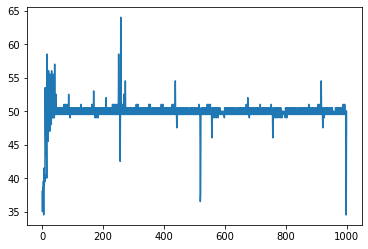

In [46]:
plt.plot(per_errors)

### Delta learning without bias

In [47]:
W_old_del = np.copy(W)
del_errors = []

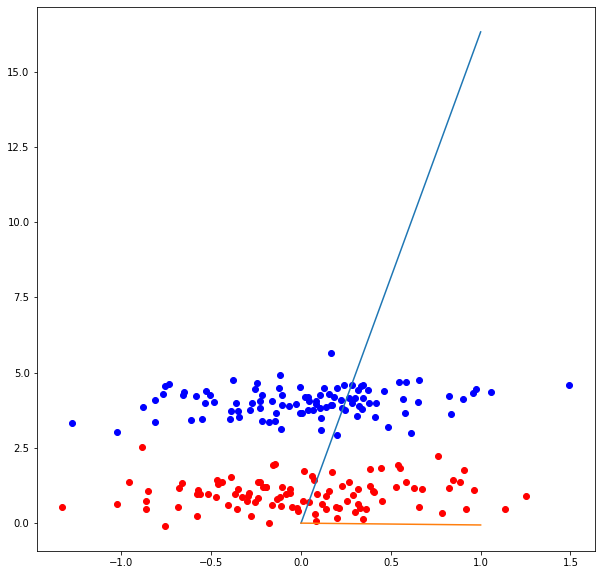

In [48]:
W_new_del, new_del_errors = perceptron_learning(0.001, 1000, W_old_del, X, T_delta, classA, classB)
W_old_del = np.copy(W_new_del)
del_errors = del_errors + new_del_errors

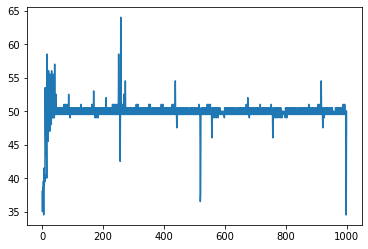

In [49]:
plt.plot(del_errors)

### Perceptron learning with bias

In [50]:
W_old_per_b = np.copy(W_bias)
per_b_errors = []

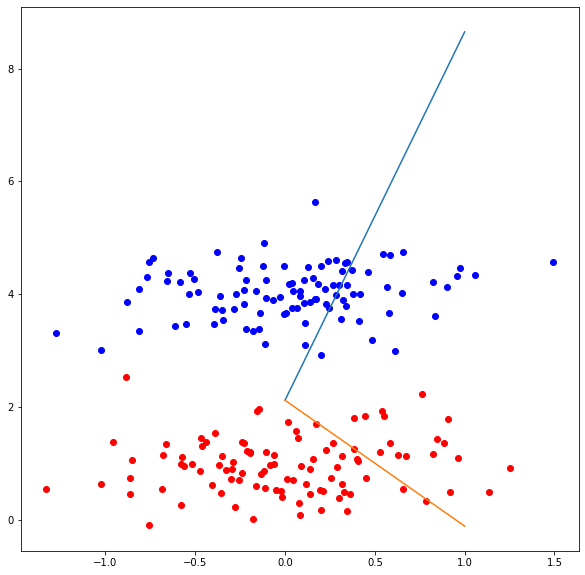

In [51]:
W_new_per_b, new_per_b_errors = perceptron_learning(0.01, 1000, W_old_per_b, X_bias, T_percept, classA, classB, True)
W_old_per_b = np.copy(W_new_per_b)
per_b_errors = per_b_errors + new_per_b_errors

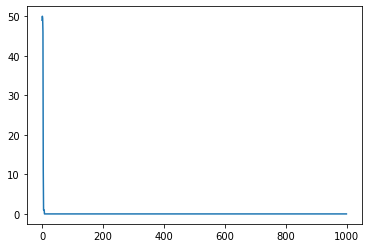

In [52]:
plt.plot(per_b_errors)

### Delta learning with bias 

In [ ]:
W_old_del_b = np.copy(W_bias)
del_b_errors = []

In [ ]:
W_new_del_b, new_del_b_errors = perceptron_learning(0.01, 1000, W_old_del_b, X_bias, T_percept, classA, classB, True)
W_old_del_b = np.copy(W_new_del_b)
del_b_errors = del_b_errors + new_del_b_errors

In [ ]:
plt.plot(del_b_errors)